In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("tweets.csv",usecols=["Location","OriginalTweet","Sentiment"])
df.head()

,Location,OriginalTweet,Sentiment
0,"Seattle, WA",When I couldn't find hand sanitizer at Fred Me...,Positive
1,Chicagoland,#Panic buying hits #NewYork City as anxious sh...,Negative
2,NaN,Voting in the age of #coronavirus = hand sanit...,Positive
3,"Boksburg, South Africa",Best quality couches at unbelievably low price...,Positive
4,"Washington, DC",While we were busy watching election returns a...,Positive


In [8]:
df.shape

(1988, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       1536 non-null   object
 1   OriginalTweet  1988 non-null   object
 2   Sentiment      1988 non-null   object
dtypes: object(3)
memory usage: 46.7+ KB


In [10]:
df.isnull().sum()

Location         452
OriginalTweet      0
Sentiment          0
dtype: int64

In [11]:
df["Sentiment"].unique()

array(['Positive', 'Negative'], dtype=object)

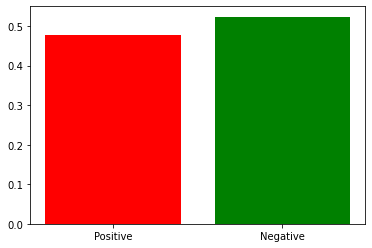

In [15]:
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) / len(df) for sentiment in sentiments]

plt.bar(sentiments, sentiment_nums,color=["red","green"]);

In [16]:
loc= df['Location'].value_counts().head(10)
loc

United States       42
London, England     25
Washington, DC      22
New York, NY        20
Los Angeles, CA     16
Canada              15
London              14
Atlanta, GA         12
California, USA     12
Toronto, Ontario    11
Name: Location, dtype: int64

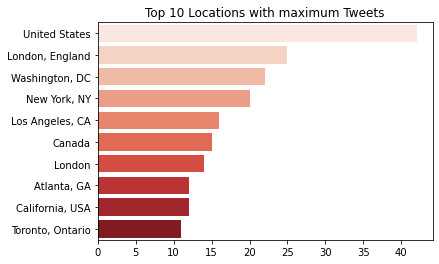

In [17]:
import seaborn as sns
a=df['Location'].value_counts().head(10)
sns.barplot(y=a.index,x=a.values,palette="Reds").set_title('Top 10 Locations with maximum Tweets');

In [33]:
def to_lower(word):
    result = word.lower()
    return result
t= to_lower(df.OriginalTweet[0])
print(t)

when i couldn't find hand sanitizer at fred meyer, i turned to #amazon. but $114.97 for a 2 pack of purell??!!check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipbflmy


In [34]:
import re
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)
t= remove_hyperlink(t)
print(t)

when i couldn't find hand sanitizer at fred meyer, i turned to #amazon. but $114.97 for a 2 pack of purell??!!check out how  #coronavirus concerns are driving up prices. 


In [35]:
def remove_mentions(word):
    return re.sub(r"@\S+", "", word)
t= remove_mentions(t)
print(t)

when i couldn't find hand sanitizer at fred meyer, i turned to #amazon. but $114.97 for a 2 pack of purell??!!check out how  #coronavirus concerns are driving up prices. 


In [36]:
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result
t= remove_number(t)
print(t)

when i couldn't find hand sanitizer at fred meyer, i turned to #amazon. but $. for a  pack of purell??!!check out how  #coronavirus concerns are driving up prices. 


In [37]:
def remove_punctuation(word):
    result = re.sub('[^A-Za-z]+', ' ', word)
    return result
t= remove_punctuation(t)
print(t)

when i couldn t find hand sanitizer at fred meyer i turned to amazon but for a pack of purell check out how coronavirus concerns are driving up prices 


In [38]:
def remove_whitespace(word):
    result = word.strip()
    return result
t= remove_whitespace(t)
print(t)

when i couldn t find hand sanitizer at fred meyer i turned to amazon but for a pack of purell check out how coronavirus concerns are driving up prices


In [39]:
def replace_newline(word):
    return word.replace('\n','')
t= replace_newline(t)
print(t)

when i couldn t find hand sanitizer at fred meyer i turned to amazon but for a pack of purell check out how coronavirus concerns are driving up prices


In [45]:
import nltk #text processing library
def tokenize(text):
    tokens = nltk.word_tokenize(text)    
    return list(filter(lambda word: word.isalnum(), tokens))
t= tokenize(t)
print(t)

['when', 'i', 'couldn', 't', 'find', 'hand', 'sanitizer', 'at', 'fred', 'meyer', 'i', 'turned', 'to', 'amazon', 'but', 'for', 'a', 'pack', 'of', 'purell', 'check', 'out', 'how', 'coronavirus', 'concerns', 'are', 'driving', 'up', 'prices']


In [47]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
# eg:i,a,an,from,etc..
stop_words.extend(["from","subject","summary","keywords", "article"])

def remove_stopwords(words):
    filtered = filter(lambda word: word not in stop_words, words)
    return list(filtered)
t= remove_stopwords(t)
print(t)

['find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', 'pack', 'purell', 'check', 'coronavirus', 'concerns', 'driving', 'prices']


In [51]:
import spacy
nlp = spacy.load("en_core_web_sm") #English pipeline optimized for CPU
def lemmatize(text, nlp=nlp):
    doc = nlp(" ".join(text))
    lemmatized = [token.lemma_ for token in doc]
    lemmatized = " ".join(lemmatized)
    return lemmatized
test_text = lemmatize(t,nlp)
print(test_text)

find hand sanitizer fred meyer turn amazon pack purell check coronavirus concern drive price


In [53]:
def cleaning_text(sentence):
    cleaning_data = [ remove_hyperlink,
                      remove_mentions,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                      remove_whitespace,
                      tokenize,
                      remove_stopwords,
                      lemmatize]
    for func in cleaning_data:
        
        sentence = func(sentence)
    return sentence

In [54]:
df["cleaned_tweets"] =df["OriginalTweet"].apply(cleaning_text)

In [55]:
df.head()

,Location,OriginalTweet,Sentiment,cleaned_tweets
0,"Seattle, WA",When I couldn't find hand sanitizer at Fred Me...,1,find hand sanitizer fred meyer turn amazon pac...
1,Chicagoland,#Panic buying hits #NewYork City as anxious sh...,0,panic buying hit newyork city anxious shopper ...
2,NaN,Voting in the age of #coronavirus = hand sanit...,1,vote age coronavirus hand sanitizer supertuesday
3,"Boksburg, South Africa",Best quality couches at unbelievably low price...,1,good quality couch unbelievably low price avai...
4,"Washington, DC",While we were busy watching election returns a...,1,busy watch election return brace covid outbrea...


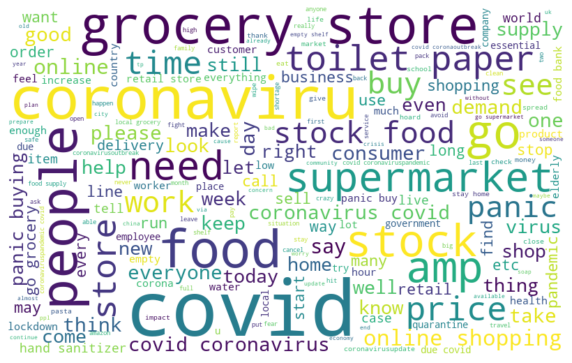

In [73]:
all_words = ' '.join([text for text in df['cleaned_tweets']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [74]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sentiment']= label_encoder.fit_transform(df['Sentiment']) #positive-->1 , negative-->0

In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tokeniser = Tokenizer(num_words=1000, lower=True)
#Create the corpus by finding the most common 
tokeniser.fit_on_texts(df["cleaned_tweets"])

In [76]:
tweet_tokens = tokeniser.texts_to_matrix(list(df["cleaned_tweets"]))

In [77]:
print(df.shape)
print(tweet_tokens.shape)

(1988, 4)
(1988, 1000)


In [78]:
#Combining the dataframe with the tokens using pd.concat
full_df = pd.concat([df, pd.DataFrame(tweet_tokens)], sort=False, axis=1)
full_df.shape

(1988, 1004)

In [79]:
full_df.head()

,Location,OriginalTweet,Sentiment,cleaned_tweets,0,1,2,3,4,5,...,990,991,992,993,994,995,996,997,998,999
0,"Seattle, WA",When I couldn't find hand sanitizer at Fred Me...,1,find hand sanitizer fred meyer turn amazon pac...,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Chicagoland,#Panic buying hits #NewYork City as anxious sh...,0,panic buying hit newyork city anxious shopper ...,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,Voting in the age of #coronavirus = hand sanit...,1,vote age coronavirus hand sanitizer supertuesday,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Boksburg, South Africa",Best quality couches at unbelievably low price...,1,good quality couch unbelievably low price avai...,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Washington, DC",While we were busy watching election returns a...,1,busy watch election return brace covid outbrea...,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
X=full_df.drop(["Sentiment", "OriginalTweet", "Location", "cleaned_tweets"], axis=1)
y = full_df["Sentiment"]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8217109992810927
Validation accuracy Score :  0.6080402010050251
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       306
           1       0.60      0.60      0.60       291

    accuracy                           0.61       597
   macro avg       0.61      0.61      0.61       597
weighted avg       0.61      0.61      0.61       597



In [101]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9604601006470166
Validation accuracy Score :  0.644891122278057
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       364
           1       0.54      0.68      0.60       233

    accuracy                           0.64       597
   macro avg       0.64      0.65      0.64       597
weighted avg       0.67      0.64      0.65       597



In [102]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.918763479511143
Validation accuracy Score :  0.644891122278057
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       316
           1       0.62      0.65      0.63       281

    accuracy                           0.64       597
   macro avg       0.64      0.65      0.64       597
weighted avg       0.65      0.64      0.65       597

